In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import spacy
from bs4 import BeautifulSoup
import time

In [3]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding , Activation, LSTM 
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Input,Lambda,Reshape

2.2.0


Using TensorFlow backend.


In [4]:
file_1 = "/content/gdrive/My Drive/data/data.csv"
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

also_remove = ['  ' , '.' , '..' , '...' , '[' , ']', '}', '{', '(' , ')' ,',']

{'here', 'nor', 'mustn', 'yourself', 'yours', 'hers', 'have', "shouldn't", 'against', 'don', 'am', "hasn't", "you've", 'they', 'same', "that'll", "couldn't", 'for', 'too', 'out', 'we', 'her', 'under', 'until', 'this', 'ma', 'few', 'are', 'theirs', 'couldn', "you'd", 'about', "wasn't", 'and', "isn't", "won't", 'before', 'it', 'if', 'while', 'all', 'he', 'ain', "it's", 'm', 'their', 'those', "aren't", 'so', 'will', 'when', 'over', 'isn', 'on', 'some', "doesn't", 'why', 'weren', 'more', 'd', 'is', 'own', 'me', 'can', 're', 'haven', 'as', 'll', 'had', "wouldn't", 'whom', 'she', 'your', 'hadn', "needn't", 'was', 'any', 'during', 'been', 'what', 'being', 'again', "weren't", 'most', 'wouldn', 'above', 'them', 'shan', "mightn't", 'hasn', "you're", 'him', 'each', 'of', 'off', 'didn', 'at', 'myself', "mustn't", 'a', 'an', 'but', 've', 'between', "hadn't", 'after', 'with', "didn't", 'its', 'further', 'or', 'o', 'were', 'herself', 'ours', 'i', "she's", 'themselves', 'once', 'who', 'that', 'not', "

In [6]:
reviews = []
labels = []

start_time = time.time()

with open(file_1 , 'r') as csvfile:
  reader = csv.reader(csvfile , delimiter = ',')
  next(reader)
  for row in reader:
    if row[1] == "positive": labels.append(1)
    if row[1] == "negative" : labels.append(0)
    # labels.append(row[1])
    review = row[0].lower()
    BeautifulSoup(review, "lxml")                                               #remove html tags
    review = review.replace('[^\w\s]','')                                       #remove puntuations
    review = review.replace("<br /><br />"," ")                                 #remove particular tags
    review = "".join([i for i in review if not i.isdigit()])                    #remove_digits
    for word in stopWords:                                                      #remove stopwords
      stopword = " " + word + " "
      review = review.replace(stopword , " ")
    for i in also_remove:
      review = review.replace(i,"")
    reviews.append(review)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 0.75 mins


In [8]:
reviews = np.array(reviews)
labels = np.array(labels)

print('len', type(labels[0]))
training_sentences = reviews[:40000]
testing_sentences = np.array(reviews[40000:])

training_labels_final = np.array(labels[:40000])
testing_labels_final = np.array(labels[40000:])

len <class 'numpy.int64'>


In [9]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.LSTM(units = 128,return_sequences = True),
    # tf.keras.layers.Dropout(rate=0.5),
    # tf.keras.layers.LSTM(units =128 ,return_sequences = True),
    # tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
MODEL = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3946 - accuracy: 0.8081 - val_loss: 0.2833 - val_accuracy: 0.8810
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2007 - accuracy: 0.9238 - 

Text(0.5, 1.0, 'accuray vs epochs')

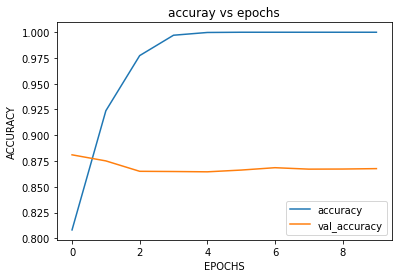

In [10]:
import matplotlib.pyplot as plt

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.plot(MODEL.history["accuracy"])
plt.plot(MODEL.history["val_accuracy"])
plt.legend(['accuracy','val_accuracy'])
plt.title("accuray vs epochs")


Text(0.5, 1.0, 'loss  vs epochs')

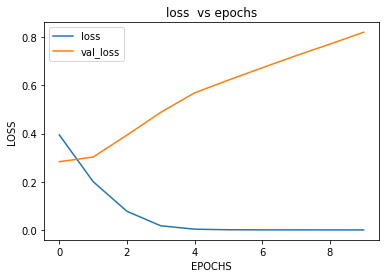

In [12]:
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.plot(MODEL.history["loss"])
plt.plot(MODEL.history["val_loss"])
plt.legend(["loss","val_loss"])
plt.title("loss  vs epochs")